In [1]:
#%pip install pandas matplotlib seaborn xgboost

import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import datetime as dt

In [2]:
df = pd.read_csv("./data/train.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [4]:
print(df.duplicated().sum(), 'Duplicated rows')

313 Duplicated rows


# Pre-processing 

In [5]:
# Drop duplicates 
df.drop_duplicates(inplace=True)

# Drop irrelevant features
df.drop(columns=['ID', 'Levy'], inplace=True)

# Count rows with at least one null value
num_rows_with_null = df.isnull().any(axis=1).sum()
print("Rows with at least one null value:", num_rows_with_null)
#There is none 

print(df.dtypes)




Rows with at least one null value: 0
Price                 int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object


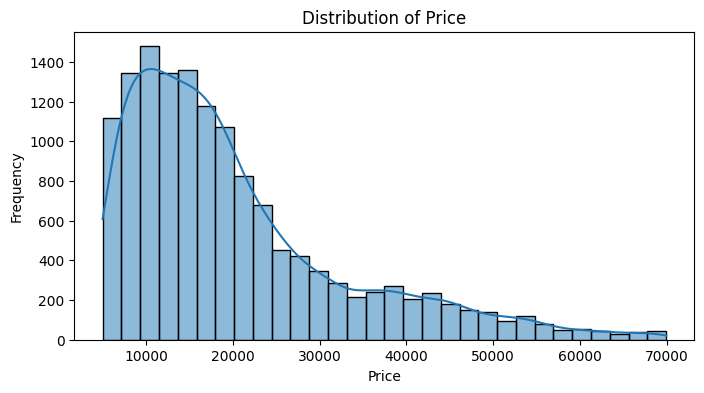

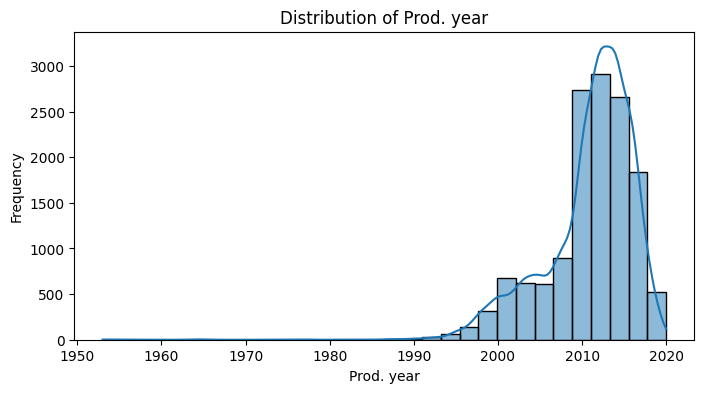

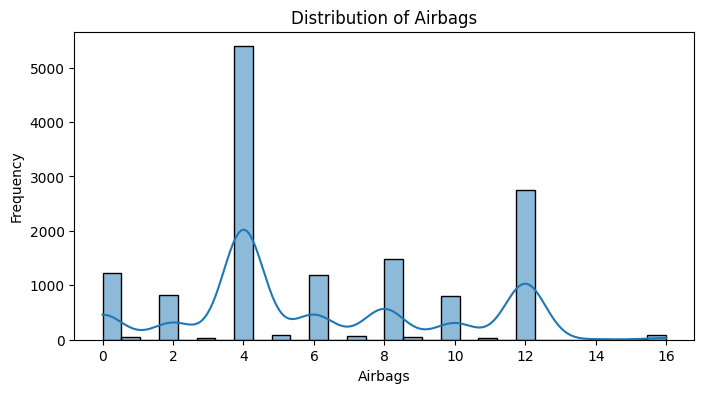

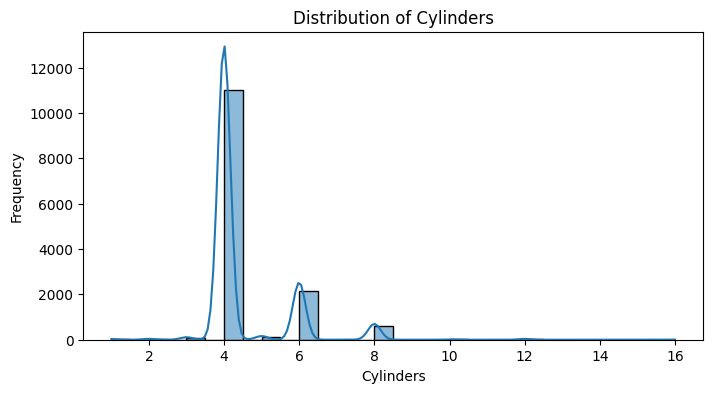

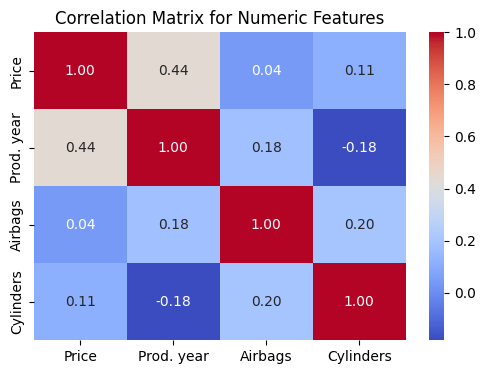

In [6]:
# ===============================
# 1. Remove prices above 70,000 to avoid outliers  + prices below 5.000
# ===============================
df = df[(df["Price"] >= 5000) & (df["Price"] <= 70000)]


# ===============================
# 2. Distribution Analysis
# ===============================

# Identify numeric and categorical columns
numeric_cols = ['Price', 'Prod. year', 'Airbags', 'Cylinders']
categorical_cols = [
    'Manufacturer', 'Model', 'Category', 'Leather interior', 
    'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'
]

# Plot distribution of numeric variables
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# ===============================
# 3. Correlation Analysis
# ===============================

# Calculate the correlation matrix for numeric features
corr_matrix = df[numeric_cols].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Features')
plt.show()



In [7]:
df['Mileage'] = df['Mileage'].apply(lambda x: x.split(' ')[0])
df['Mileage'] = df['Mileage'].astype(int)
df['Turbo'] = df['Engine volume'].str.contains('Turbo')
df['Engine volume'] = df['Engine volume'].apply(lambda x: x.split(' ')[0])
df['Engine volume'] = df['Engine volume'].astype(float)
df['Doors'].value_counts()
df['Doors'] = df['Doors'].replace('04-May', '4')
df['Doors'] = df['Doors'].replace('02-Mar', '2')
df['Doors'] = df['Doors'].replace('>5', '5')
df['Doors'] = df['Doors'].astype(int)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower()
currt_time = dt.datetime.now()
df['Prod. year'] = currt_time.year - df['Prod. year'] 

dummies = pd.get_dummies(df[['Drive wheels','Gear box type', 'Fuel type']], prefix=['Drive', 'Gear', 'Fuel'])
df = pd.concat([df, dummies], axis=1)
df.drop(['Drive wheels','Gear box type', 'Fuel type'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14079 entries, 0 to 19235
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                14079 non-null  int64  
 1   Manufacturer         14079 non-null  object 
 2   Model                14079 non-null  object 
 3   Prod. year           14079 non-null  int64  
 4   Category             14079 non-null  object 
 5   Leather interior     14079 non-null  object 
 6   Engine volume        14079 non-null  float64
 7   Mileage              14079 non-null  int64  
 8   Cylinders            14079 non-null  float64
 9   Doors                14079 non-null  int64  
 10  Wheel                14079 non-null  object 
 11  Color                14079 non-null  object 
 12  Airbags              14079 non-null  int64  
 13  Turbo                14079 non-null  bool   
 14  Drive_4x4            14079 non-null  bool   
 15  Drive_front          14079 non-null  bool

# Correlation matrix

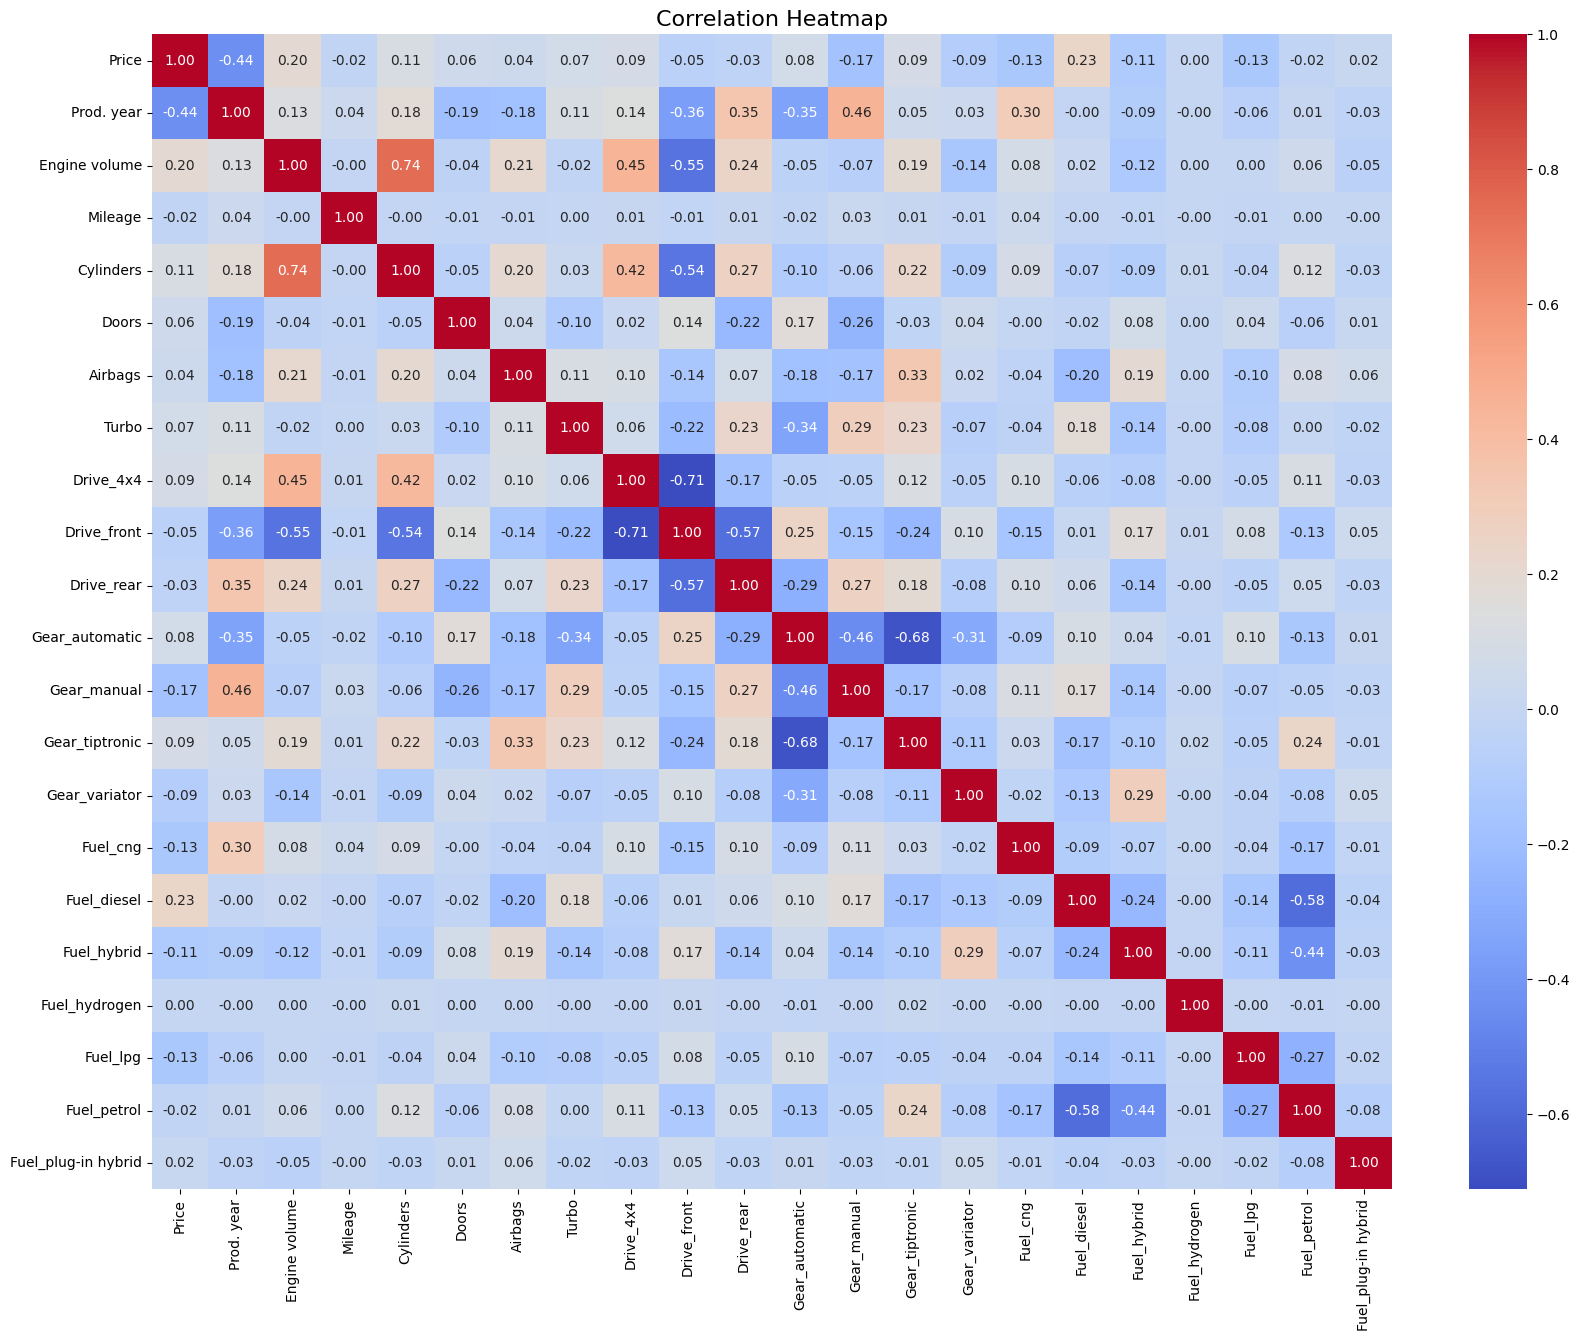

In [8]:
corr_columns = df.select_dtypes(include=['number', 'bool'])
correlation_matrix = corr_columns.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Label encoder

In [9]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14079 entries, 0 to 19235
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                14079 non-null  int64  
 1   Manufacturer         14079 non-null  int64  
 2   Model                14079 non-null  int64  
 3   Prod. year           14079 non-null  int64  
 4   Category             14079 non-null  int64  
 5   Leather interior     14079 non-null  int64  
 6   Engine volume        14079 non-null  float64
 7   Mileage              14079 non-null  int64  
 8   Cylinders            14079 non-null  float64
 9   Doors                14079 non-null  int64  
 10  Wheel                14079 non-null  int64  
 11  Color                14079 non-null  int64  
 12  Airbags              14079 non-null  int64  
 13  Turbo                14079 non-null  bool   
 14  Drive_4x4            14079 non-null  bool   
 15  Drive_front          14079 non-null  bool

In [10]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Separate target variable and features
X = df.drop("Price", axis=1)
y = df["Price"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


print(f"Shape of training inputs: {X_train.shape}")
print(f"Shape of testing inputs: {X_test.shape}")

Shape of training inputs: (11263, 27)
Shape of testing inputs: (2816, 27)


# Fitting a model using XGBRegressor

In [11]:
model = XGBRegressor (
    n_estimators=1200,
    max_depth=10,
    learning_rate=0.01,
    min_child_weight=1,
    subsample=0.6,
    colsample_bytree=0.8,
    reg_lambda=0.3,
)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 31170708.0
Mean Absolute Error (MAE): 3521.687255859375
R-squared: 0.8048144578933716


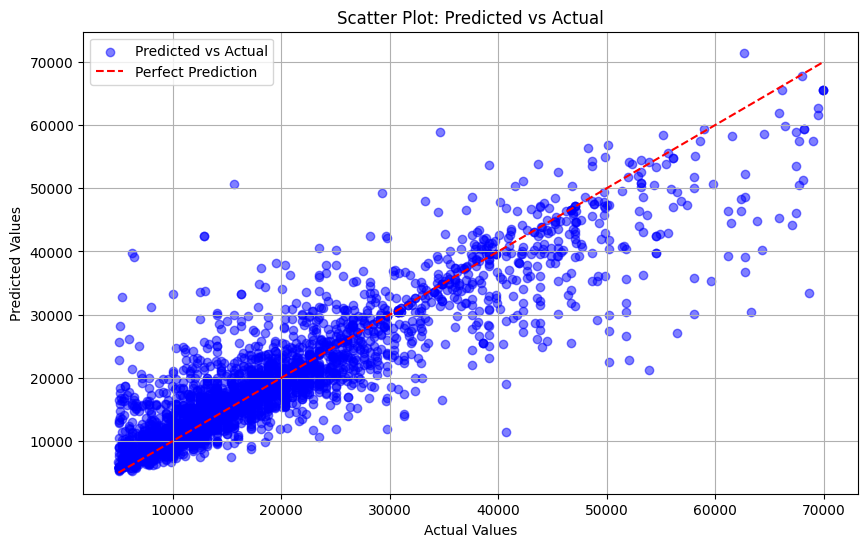

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

# Grid Search to optimize model parameters 

In [14]:
# In your training notebook, add after preprocessing
print(f"Training features: {X_train.columns.tolist()}")
print(f"Number of features: {len(X_train.columns)}")

Training features: ['Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Wheel', 'Color', 'Airbags', 'Turbo', 'Drive_4x4', 'Drive_front', 'Drive_rear', 'Gear_automatic', 'Gear_manual', 'Gear_tiptronic', 'Gear_variator', 'Fuel_cng', 'Fuel_diesel', 'Fuel_hybrid', 'Fuel_hydrogen', 'Fuel_lpg', 'Fuel_petrol', 'Fuel_plug-in hybrid']
Number of features: 27


In [13]:
import pickle
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [800, 1000, 1200],
    'max_depth': [8, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0.1, 0.3, 0.5]
}

# Create the base model
xgb_model = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=100,
    scoring='neg_root_mean_squared_error',
    cv=10,
    n_jobs=-1,
    verbose=3, 
    random_state=42
)

# Fit random search on the training data
random_search.fit(X_train, y_train)

# Retrieve the best model and its parameters
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Save the best model to a pickle file
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)





Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 3/10] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=0.1, subsample=0.8;, score=-6412.032 total time=   2.3s
[CV 2/10] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=0.1, subsample=0.8;, score=-6279.963 total time=   2.4s
[CV 6/10] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=0.1, subsample=0.8;, score=-5357.725 total time=   2.2s
[CV 1/10] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=0.1, subsample=0.8;, score=-6071.407 total time=   2.5s
[CV 7/10] END colsample_bytree=1.0, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=0.1, subsample=0.8;, score=-6021.729 total time=   2.4s
[CV 4/10] END colsample_bytree=1.0, learning_rate=0.05,

/Users/jbt/Desktop/DataScience/venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 7/10] END colsample_bytree=0.6, learning_rate=0.01, max_depth=12, min_child_weight=3, n_estimators=1200, reg_lambda=0.3, subsample=0.8;, score=-5937.837 total time=   3.6s
[CV 8/10] END colsample_bytree=0.6, learning_rate=0.01, max_depth=12, min_child_weight=3, n_estimators=1200, reg_lambda=0.3, subsample=0.8;, score=-6220.396 total time=   3.7s
[CV 1/10] END colsample_bytree=0.6, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=800, reg_lambda=0.3, subsample=0.8;, score=-6198.307 total time=   3.5s
[CV 2/10] END colsample_bytree=0.6, learning_rate=0.05, max_depth=12, min_child_weight=1, n_estimators=800, reg_lambda=0.3, subsample=0.8;, score=-6164.600 total time=   3.5s
[CV 9/10] END colsample_bytree=0.6, learning_rate=0.01, max_depth=12, min_child_weight=3, n_estimators=1200, reg_lambda=0.3, subsample=0.8;, score=-5493.097 total time=   3.8s
[CV 10/10] END colsample_bytree=0.6, learning_rate=0.01, max_depth=12, min_child_weight=3, n_estimators=1200, reg_lambda=0